### Getting Started

#### Understanding the data

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading the data
data=pd.read_json(r'fashion_products_dataset.json')

In [3]:
# Column name
data.columns

Index(['_id', 'actual_price', 'average_rating', 'brand', 'category',
       'crawled_at', 'description', 'discount', 'images', 'out_of_stock',
       'pid', 'product_details', 'seller', 'selling_price', 'sub_category',
       'title', 'url'],
      dtype='object')

In [4]:
# Datashape
data.shape

(30000, 17)

In [5]:
# Sample
data.sample(3)

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
15437,f0172025-22de-5041-9d21-63e13037ae18,300,1.3,Lafabriquei,Clothing and Accessories,2021-02-10 23:06:01,Men's Traditional cotton underwear with String...,17% off,[https://rukminim1.flixcart.com/image/128/128/...,False,BXRFGRU7HABWU2RF,"[{'Color': 'Light Green'}, {'Fabric': 'Cotton ...",Lafabrique,249,Innerwear and Swimwear,Striped Men Boxer (Pack of 1),https://www.flipkart.com/lafabriqueind-striped...
9991,62d8fe21-082d-530a-8a45-e8aeecb0b7fc,"1,299",3.3,Breakboun,Clothing and Accessories,2021-02-10 22:02:18,,50% off,[https://rukminim1.flixcart.com/image/128/128/...,False,SRTFWHDUQSZCZWVZ,"[{'Fabric': 'Cotton Blend'}, {'Pattern': 'Soli...",BREAKBOUNCE,649,Bottomwear,Solid Men Grey Cargo Shorts,https://www.flipkart.com/breakbounce-solid-men...
7061,cc678ace-ddfa-5a23-aee5-c88eb25a5e96,"1,299",5,Dudli,Clothing and Accessories,2021-02-10 21:26:15,,46% off,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFF4WQCJGGREYM,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",DudlindFashion,699,Topwear,Solid Men Polo Neck Green T-Shirt,https://www.flipkart.com/dudlind-solid-men-pol...


In [6]:
# Product_detail column
data['product_details'].tolist()[0]

[{'Style Code': '1005COMBO2'},
 {'Closure': 'Elastic'},
 {'Pockets': 'Side Pockets'},
 {'Fabric': 'Cotton Blend'},
 {'Pattern': 'Solid'},
 {'Color': 'Multicolor'}]

#### Data cleaning

##### Datatypes

In [7]:
# Data type
data.dtypes

_id                        object
actual_price               object
average_rating             object
brand                      object
category                   object
crawled_at         datetime64[ns]
description                object
discount                   object
images                     object
out_of_stock                 bool
pid                        object
product_details            object
seller                     object
selling_price              object
sub_category               object
title                      object
url                        object
dtype: object

In [8]:
# Function to convert string to int
def comma(x):
    if x != '':
        return(int(x.replace(',','')))

In [9]:
# Datatype conversion
data['selling_price']=data['selling_price'].astype(str).apply(comma)
data['actual_price']=data['actual_price'].astype(str).apply(comma)

In [10]:
# Replacing empty with nan
data=data.replace('',np.nan)

In [11]:
# Aerage rating column datatype
data['average_rating']=data['average_rating'].astype(float)

In [12]:
# Discount datatype conversion
data['discount']=data['discount'].apply(lambda x: str(x).rstrip('% off')).astype(float)

##### Inconsistent Data

In [13]:
# Checking for duplicates
duplicates=data[data.duplicated(subset=['pid'])]
duplicates

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
213,b72c1f5a-96a9-5bb5-b6fb-165a6a6d6fdf,899.0,4.3,DISCOUNT OUTL,Clothing and Accessories,2021-02-10 20:13:33,NaN,62.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFZ67FRJPUYAWZ,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",S P TRADERS,339.0,Topwear,Solid Men Polo Neck Blue T-Shirt,https://www.flipkart.com/discount-outlet-solid...
215,3f4c5da9-e7b3-5ddb-9483-18acafe9095c,599.0,4.8,DISCOUNT OUTL,Clothing and Accessories,2021-02-10 20:13:35,"Easy-to-wear and truly comfy, this tee is for ...",51.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFWTRVHPKXGTVJ,"[{'Type': 'Round Neck'}, {'Sleeve': 'Short Sle...",S P TRADERS,289.0,Topwear,Solid Men Round Neck Red T-Shirt,https://www.flipkart.com/discount-outlet-solid...
216,717dbc88-1465-5ba3-bc53-953c59149f4a,569.0,3.8,DISCOUNT OUTL,Clothing and Accessories,2021-02-10 20:13:35,NaN,47.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFYF6BFWFHZCG4,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",S P TRADERS,297.0,Topwear,Self Design Men Polo Neck Red T-Shirt,https://www.flipkart.com/discount-outlet-self-...
218,e85da67a-d3ec-57a6-a77d-e395bfddd492,899.0,3.9,DISCOUNT OUTL,Clothing and Accessories,2021-02-10 20:13:36,NaN,44.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFYFASUQVT8ZVE,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",S P TRADERS,499.0,Topwear,"Solid Men Polo Neck Dark Blue, Blue T-Shirt (...",https://www.flipkart.com/discount-outlet-solid...
219,3f727bc6-9b92-5040-b28a-4d7a8277cb1d,1625.0,4.3,DISCOUNT OUTL,Clothing and Accessories,2021-02-10 20:13:37,"Crafted in a pure cotton fabric, this long-sle...",60.0,[https://rukminim1.flixcart.com/image/128/128/...,False,SHTFVVCNDWPWPQDE,"[{'Pack of': '1'}, {'Style Code': 'C501_NAVYBL...",S P TRADERS,649.0,Topwear,Men Tailored Fit Solid Casual Shirt,https://www.flipkart.com/discount-outlet-men-s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29861,1cb0bac7-5108-570b-b581-65bd45fdc8db,1250.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:48,‘OKANE’ endeavors to continue to be a leader i...,44.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFV8S9NBUYGFZG,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Full Sleev...",OKANE,688.0,Topwear,Solid Men Polo Neck Blue T-Shirt,https://www.flipkart.com/okane-solid-men-polo-...
29862,fec68815-3c03-5a5e-9860-83f2949de85b,1199.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:48,NaN,44.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFT4FAWVFV2VC4,"[{'Type': 'Collared Neck'}, {'Sleeve': 'Half S...",OKANE,660.0,Topwear,Checkered Men Collared Neck Blue T-Shirt,https://www.flipkart.com/okane-checkered-men-c...
29864,12bde1e0-fd5b-506b-90f9-5fdd06317c62,1149.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:49,‘OKANE’ endeavors to continue to be a leader i...,44.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFJK3KMFSQWDNW,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Half Sleev...",OKANE,632.0,Topwear,Striped Men Polo Neck Yellow T-Shirt,https://www.flipkart.com/okane-striped-men-pol...
29865,9a3203e0-6dcb-5036-a01b-f9757c643cee,1149.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:50,Enhance your look with this T-Shirt and you wi...,44.0,[https://rukminim1.flixcart.com/image/128/128/...,False,TSHFHGEYDG2ZTBM2,"[{'Type': 'Polo Neck'}, {'Sleeve': 'Short Slee...",OKANE,632.0,Topwear,"Striped Men Polo Neck White, Black, Yellow T-S...",https://www.flipkart.com/okane-striped-men-pol...


In [14]:
# Checking a value
data[data['pid']=='JCKFX4XUHKHVHGEG']

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url
29860,8eeb0113-025b-5baf-8269-50fabace1e4e,3025.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:47,NaN,40.0,[https://rukminim1.flixcart.com/image/128/128/...,False,JCKFX4XUHKHVHGEG,"[{'Color': 'Yellow'}, {'Fabric': 'Nylon'}, {'P...",OKANE,1815.0,Winter Wear,Full Sleeve Solid Men Jacket,https://www.flipkart.com/okane-full-sleeve-sol...
29868,bdbf472a-ad04-5ed4-a9e4-3226796a6b0d,3025.0,3.8,Oka,Clothing and Accessories,2021-02-11 01:30:51,NaN,40.0,[https://rukminim1.flixcart.com/image/128/128/...,False,JCKFX4XUHKHVHGEG,"[{'Color': 'Yellow'}, {'Fabric': 'Nylon'}, {'P...",OKANE,1815.0,Winter Wear,Full Sleeve Solid Men Jacket,https://www.flipkart.com/okane-full-sleeve-sol...


In [15]:
# Droping the duplicates
data.drop_duplicates(subset=['pid'],inplace=True)

In [16]:
# Checking duplicates after droping
data.duplicated(subset=['pid']).sum()

0

In [17]:
# Checking for data with negative rating
data[data['average_rating']<0 ].shape

(0, 17)

In [18]:
# Checking for rating more than 5
data[data['average_rating']>5 ].shape

(0, 17)

In [19]:
# Checking for negative price
data[data['actual_price']<0]

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url


In [20]:
# Checking for negative price
data[data['selling_price']<0]

,_id,actual_price,average_rating,brand,category,crawled_at,description,discount,images,out_of_stock,pid,product_details,seller,selling_price,sub_category,title,url


##### Dealing With null values

<Axes: >

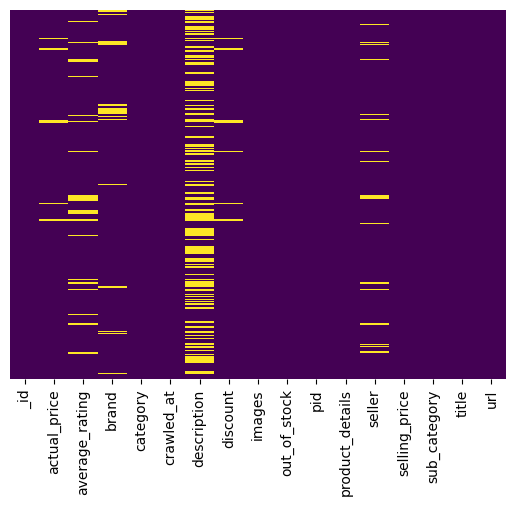

In [21]:
# Plotting the null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [22]:
# Checking for null values
data.isna().sum()

_id                    0
actual_price         777
average_rating      2261
brand               2009
category               0
crawled_at             0
description        11150
discount             855
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1643
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [23]:
# Finding the seller name with brand
data[data['seller'].isna() & data['brand'].notna()].shape

(1301, 17)

In [24]:
# Replacing the seller name with mode of groupedby brand
data['seller'] = data['seller'].fillna((data.groupby('brand')['seller']).agg(pd.Series.mode))

In [25]:
# Finding the brand name with seller
data[data['brand'].isna() & data['seller'].notna()].shape

(1667, 17)

In [26]:
# Replacing the brand name with mode of groupedby seller
data['brand'] = data['brand'].fillna((data.groupby('seller')['brand']).agg(pd.Series.mode))

In [27]:
# Finding the discount with brand
data[data['discount'].isna() & data['brand'].notna()].shape

(751, 17)

In [28]:
# Replacing the discount with mean discount of brand
data['discount']=data['discount'].fillna((data.groupby('brand')['discount']).transform('mean'))

In [29]:
# Finding the actual price with discount and selling price
data[data['actual_price'].isna() & data['discount'].notna() & data['selling_price'].notna()].shape

(458, 17)

In [30]:
# Filling the actual price
data['actual_price']=data['actual_price'].fillna((data['selling_price']*100)/data['discount'])

In [31]:
# Filling the average rating column
data['average_rating']=data['average_rating'].fillna(data.groupby(['brand','seller'])['average_rating'].transform('mean'))

<Axes: >

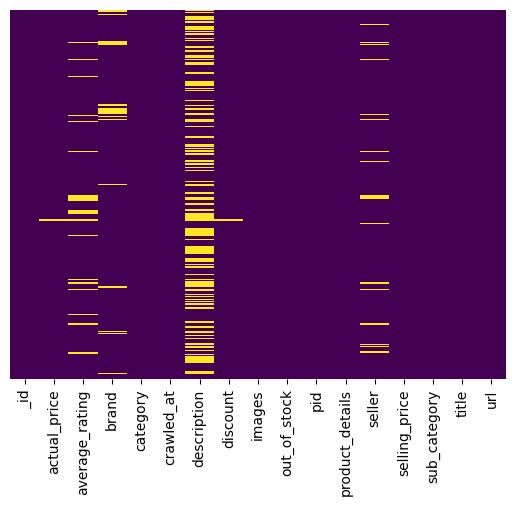

In [32]:
# Plotting the null values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [33]:
# Null values
data.isna().sum()

_id                    0
actual_price         319
average_rating      1975
brand               2009
category               0
crawled_at             0
description        11150
discount             321
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1643
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [34]:
# Filling the average rating column
data['average_rating']=data['average_rating'].fillna(data.groupby('brand')['average_rating'].transform('mean'))

In [35]:
# Null values
data.isna().sum()

_id                    0
actual_price         319
average_rating      1288
brand               2009
category               0
crawled_at             0
description        11150
discount             321
images                 0
out_of_stock           0
pid                    0
product_details        0
seller              1643
selling_price          2
sub_category           0
title                  0
url                    0
dtype: int64

In [36]:
data.shape

(28080, 17)

In [38]:
data.to_csv('fashion.csv',index=False)